# Feature Extraction with OpenCV

What are features in images? 
You can think of them as some interesting points in the image that can be used to describe the image. Something as IDs for the image. They are useful for matching different parts of the same image or different images of the same scene. For example, if you take a picture of the same object in different conditions, the features of the image will be the same.

Having said this, lets just dive into Template Matching

Also for this tutorial we will have to install a new library called ```imutils``` which is not available in the default environment. So we will have to install it using the following command

```pip install imutils```

Shoutout to [Adrian Rosebrock](https://www.pyimagesearch.com/author/adrian/) for this amazing library

In [1]:
!pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: imutils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for imutils ... done

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [18]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
# This is the new library
from imutils.object_detection import non_max_suppression

In [6]:
asset_library =    os.path.join(os.getcwd(), 'assets')
# Reading the image and the template
img = cv2.imread(os.path.join(asset_library, 'matches.png'))
temp = cv2.imread(os.path.join(asset_library, 'template.jpeg'))

In [8]:
# save the image dimensions
W, H = temp.shape[:2]
print("Width: ", W, "Height: ", H)

Width:  126 Height:  126


Setting a treshold for the template matching is a bit tricky. We will have to experiment with different values to get the best results.

In [9]:

# Define a minimum threshold
thresh = 0.4

In [11]:
# Converting them to grayscale as we saw on the previous lectures
img_gray = cv2.cvtColor(img,
                        cv2.COLOR_BGR2GRAY)
temp_gray = cv2.cvtColor(temp,
                         cv2.COLOR_BGR2GRAY)

## The matchTemplate method

The ```matchTemplate``` method is used to search for the template in the image. It takes the template and the image as input and returns a grayscale image where each pixel denotes how much does the neighbourhood of that pixel match with the template. the method also takes a parameter called ```method``` which is used to specify the method of matching. The default method is ```cv2.TM_SQDIFF``` which is the sum of squared difference between the template and the neighbourhood of the pixel. The other methods are ```cv2.TM_CCORR``` which is the cross correlation between the template and the neighbourhood of the pixel and ```cv2.TM_CCOEFF``` which is the cross correlation coefficient between the template and the neighbourhood of the pixel.

documentation - > https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html?highlight=matchtemplate#matchtemplate

In [12]:
# Passing the image to matchTemplate method
match = cv2.matchTemplate(
    image=img_gray, templ=temp_gray,
    method=cv2.TM_CCOEFF_NORMED)

This is similar as a thresholding operation, but instead of having a binary image, we have a grayscale image with values between 0 and 1. The higher the value, the more similar the template is to the image.



In [15]:

# Select rectangles with
# confidence greater than threshold
(y_points, x_points) = np.where(match >= thresh)
# initialize our list of rectangles
boxes = list()


In [16]:
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(x_points, y_points):

	# update our list of rectangles
	boxes.append((x, y, x + W, y + H))

# apply non-maxima suppression to the rectangles
# this will create a single bounding box
boxes = non_max_suppression(np.array(boxes))

In [17]:
# The coordinates of this bounding box are:
# x1 : top left x-coordinate
# y1 : top left y-coordinate
# x2 : bottom right x-coordinate
# y2 : bottom right y-coordinate


# loop over the final bounding boxes
for (x1, y1, x2, y2) in boxes:

	# draw the bounding box on the image
	cv2.rectangle(img, (x1, y1), (x2, y2),
               (255, 0, 0), 3)
    

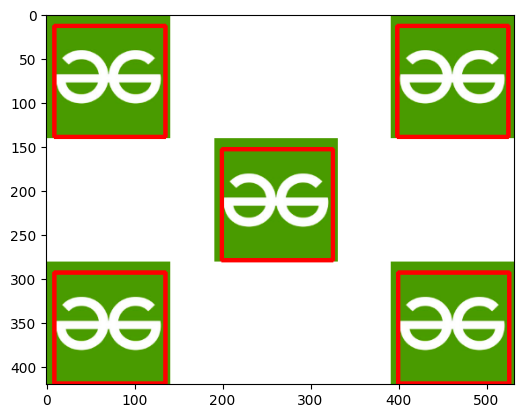

In [19]:
plt.imshow(img)